# Sentiment Analysis on Covid-19 Vaccine

In [2]:
#To ignore all the warnings
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

In [3]:
import nest_asyncio
nest_asyncio.apply()
import pandas as pd
import tweepy
import json
import random
import os
from tqdm import tqdm, notebook
import numpy as np
import datetime

In [4]:
#APPLY FOR TWITTER API AND USE YOUR KEY AND TOKENS BELOW
#Part-1: Authorization and Search tweets
#Getting authorization
consumer_key = 'HyVObPebtL8qPYCjQCn9WURm5'
consumer_secret = 'GMa8ijxXfivLFNScohwru59taD15QUyRMpI2EohPqMx84BBisS'
access_token = '1140681470492565507-56l8ercZ5yA7UK89Ij4RMUmG3wwsuc'
access_token_secret = 'cpjba9wwf4bNGiklIrLJT1DETQn0oJS6gDN17veKOc2pZ'
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth, wait_on_rate_limit=True)

In [ ]:
#Change the Search words to your search or keywords

search_words = "(Covid-19 (vaccine OR 'booster shot')) OR ((Moderna OR 'Johnson & Johnson' OR Janssen OR Pfizer OR BioNTech OR Comirnaty OR AstraZeneca OR Novavax) (Covid-19  OR vaccine OR 'booster shot')"
date_since = datetime.datetime(2021,1,1,0,0,0)
date_end = datetime.datetime(2021,10,31,0,0,0)

# Collect tweets
tweets = tweepy.Cursor(api.search_tweets,
              q=search_words,
              lang="en").items(100000)
#CHANGE THE ITEM(900) ABOVE TO THE NUMBER OF TWEETS THAT YOU WANT TO COLLECT 

In [ ]:
tweets_text = []

In [ ]:
tweets_copy = []
for tweet in tqdm(tweets):
     tweets_copy.append(tweet)

In [ ]:
tweets_df = pd.DataFrame()
for tweet in tqdm(tweets_copy):
    hashtags = []
    try:
        for hashtag in tweet.entities["hashtags"]:
            hashtags.append(hashtag["text"])
        text = api.get_status(id=tweet.id, tweet_mode='extended').full_text
    except:
        pass
    tweets_df = tweets_df.append(pd.DataFrame({'user_name': tweet.user.name, 
                                               'user_location': tweet.user.location,\
                                               'user_description': tweet.user.description,
                                               'user_created': tweet.user.created_at,
                                               'user_followers': tweet.user.followers_count,
                                               'user_friends': tweet.user.friends_count,
                                               'user_favourites': tweet.user.favourites_count,
                                               'user_verified': tweet.user.verified,
                                               'date': tweet.created_at,
                                               'text': text, 
                                               'hashtags': [hashtags if hashtags else None],
                                               'source': tweet.source,
                                               'is_retweet': tweet.retweeted}, index=[0]))

In [ ]:
from datetime import date
tweets_df.head()
filename = 'tweepy_uncleaned_'+str(date.today())+'.csv'
tweets_df.to_csv(filename)

In [ ]:
tweets_df.drop_duplicates(subset = ["user_name", "date", "text"], inplace=True)
print(f"all tweets: {tweets_df.shape}")

In [ ]:
tweets_df.columns

In [ ]:
tweets=tweets_df.drop(['user_friends', 'user_name','user_description','user_followers','user_favourites','user_friends', 'hashtags', 'source','user_verified','user_created',], axis=1)

In [ ]:
tweets.head()

In [ ]:
tweets_df.drop_duplicates(subset = ["user_name", "date", "text"], inplace=True)
print(f"all tweets: {tweets_df.shape}")

In [ ]:
tweets['text'].nunique()

In [5]:
# load library
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

# download the set of stop words the first time
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\dhwan\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [6]:
# Load stop words
stop_words = stopwords.words('english')

# Show stop words
stop_words[:10]

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're"]

In [7]:
#Cleaning Tweets
import re 
from textblob import TextBlob 
import emoji  

def clean_tweet(text): 
    text = re.sub(r'@[A-Za-z0-9]+', '', str(text)) # remove @mentions
    text = re.sub(r'#', '',  str(text)) # remove the '#' symbol
    text = re.sub(r'RT[\s]+', '',  str(text)) # remove RT
    text = re.sub(r'https?\/\/S+', '',  str(text)) # remove the hyperlink
    text = re.sub(r'http\S+', '',  str(text)) # remove the hyperlink
    text = re.sub(r'www\S+', '',  str(text)) # remove the www
    text = re.sub(r'twitter+', '',  str(text)) # remove the twiiter
    text = re.sub(r'pic+', '',  str(text)) # remove the pic
    text = re.sub(r'com', '',  str(text)) # remove the pic

    return text

def remove_emoji(text):
    return emoji.get_emoji_regexp().sub(u'', text)

In [ ]:
tweets['cleaned_text']=tweets['text'].apply(clean_tweet)
tweets['cleaned_text']=tweets['cleaned_text'].apply(remove_emoji)

In [ ]:
tweets = tweets.drop_duplicates(subset = ['cleaned_text'])
filename = 'tweepy_cleaned_dedup_'+str(date.today())+'.csv'
tweets.to_csv(filename, encoding = 'utf-8-sig')

In [ ]:
# Remove stop words
tweets['cleaned_text_no_stopwords']=tweets['cleaned_text'].apply(lambda words: ' '.join(word.lower() for word in words.split() if word not in stop_words))

In [ ]:
tweets.head()
filename = 'tweepy_cleaned_dedup_nostopwords_'+str(date.today())+'.csv'

# DATA CLEANING

In [1]:
from wordcloud import WordCloud,ImageColorGenerator
from PIL import Image
import urllib
import requests
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt

In [ ]:
tweets1112 = pd.read_csv('tweepy_cleaned_dedup_2021-11-12.csv')
tweets1112.shape

In [ ]:
tweets1119 = pd.read_csv('tweepy_cleaned_dedup_2021-11-19.csv')
tweets1119.shape

In [ ]:
tweets_combined = tweets1112.append(tweets1119)
tweets_combined.shape

In [ ]:
tweets_combined.to_csv('full_clean_data.csv')

In [4]:
tweets = pd.read_csv('full_clean_data.csv')
tweets.head()

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,Unnamed: 0.1.1.1,user_location,date,text,is_retweet,cleaned_text
0,0,0,0,0,NaN,2021-11-12 22:31:19+00:00,"BOOSTER: Right now, anyone ages 18 or older wh...",False,"BOOSTER: Right now, anyone ages 18 or older wh..."
1,1,1,1,0,Los Angeles,2021-11-12 22:29:48+00:00,"RT @NBCNews: Of the almost 1,000,000 people wh...",False,": Of the almost 1,000,000 people who had a boo..."
2,2,2,2,0,NaN,2021-11-12 22:27:42+00:00,RT @markpoloncarz: If it has been more than 6 ...,False,: If it has been more than 6 months since you ...
3,3,3,3,0,"San Francisco, CA",2021-11-12 22:22:26+00:00,RT @MattHaneySF: All fully vaccinated adults i...,False,: All fully vaccinated adults in California ar...
4,4,4,4,0,"Wellington City, New Zealand",2021-11-12 22:11:47+00:00,I received my second shot of the Covid-19 pfiz...,False,I received my second shot of the Covid-19 pfiz...


In [5]:
tweets.columns

Index(['Unnamed: 0', 'Unnamed: 0.1', 'Unnamed: 0.1.1', 'Unnamed: 0.1.1.1',
       'user_location', 'date', 'text', 'is_retweet', 'cleaned_text'],
      dtype='object')

In [6]:
tweets=tweets.drop(['Unnamed: 0', 'Unnamed: 0.1'], axis=1)

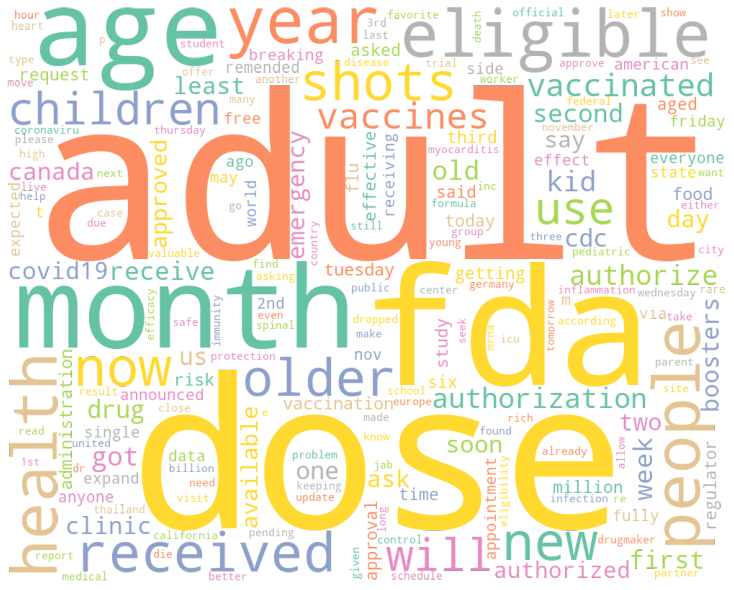

In [7]:
comment_words = '' 
stopwords = set(STOPWORDS) 
custom_stopwords = ['covid','vaccine','booster','shot','Moderna','Johnson','Janssen','Pfizer','BioNTech','Comirnaty','AstraZeneca','Novavax','s','j','amp','f','da','u']
stopwords.update(custom_stopwords)

# iterate through the csv file 
for val in tweets.cleaned_text: 
      
    # typecaste each val to string 
    val = str(val) 
  
    # split the value 
    tokens = val.split() 
      
    # Converts each token into lowercase 
    for i in range(len(tokens)): 
        tokens[i] = tokens[i].lower() 
      
    comment_words += " ".join(tokens)+" "
  
wordcloud = WordCloud(width = 1000, height = 800, 
                mode='RGBA', background_color=None, colormap='Set2', 
                collocations=False, 
                stopwords = stopwords, 
                min_font_size = 12).generate(comment_words) 
  
# plot the WordCloud image                        
plt.figure(figsize = (10, 10), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.savefig('wordcloud.png')
plt.show() 

# Data Analysis

In [8]:
import string
from textblob import TextBlob
from wordcloud import WordCloud

In [9]:
def getSubjectivity(text):
    return TextBlob( str(text)).sentiment.subjectivity

def getPolarity(text):
    return TextBlob( str(text)).sentiment.polarity

In [10]:
tweets.dropna(subset=['cleaned_text'], inplace = True)
tweets.reset_index(drop=True, inplace=True)

In [11]:
tweets['Subjectivity'] = tweets['cleaned_text'].apply(getSubjectivity)
tweets['Polarity'] = tweets['cleaned_text'].apply(getPolarity)
tweets.head()

,Unnamed: 0.1.1,Unnamed: 0.1.1.1,user_location,date,text,is_retweet,cleaned_text,Subjectivity,Polarity
0,0,0,NaN,2021-11-12 22:31:19+00:00,"BOOSTER: Right now, anyone ages 18 or older wh...",False,"BOOSTER: Right now, anyone ages 18 or older wh...",0.539683,0.275794
1,1,0,Los Angeles,2021-11-12 22:29:48+00:00,"RT @NBCNews: Of the almost 1,000,000 people wh...",False,": Of the almost 1,000,000 people who had a boo...",0.000000,0.000000
2,2,0,NaN,2021-11-12 22:27:42+00:00,RT @markpoloncarz: If it has been more than 6 ...,False,: If it has been more than 6 months since you ...,0.500000,0.500000
3,3,0,"San Francisco, CA",2021-11-12 22:22:26+00:00,RT @MattHaneySF: All fully vaccinated adults i...,False,: All fully vaccinated adults in California ar...,0.000000,0.000000
4,4,0,"Wellington City, New Zealand",2021-11-12 22:11:47+00:00,I received my second shot of the Covid-19 pfiz...,False,I received my second shot of the Covid-19 pfiz...,0.000000,0.000000


In [12]:
# Create a function to compute negative (-1), neutral (0) and positive (+1) analysis
def get_Polarity_Analysis(score):
    if score < 0:
      return 'Negative'
    elif score == 0:
      return 'Neutral'
    else:
      return 'Positive'
def get_Subjectivity_Analysis(score):
    if score >  0:
      return 'Opinion'
    else:
      return 'Fact'

tweets['Analysis_Polarity'] = tweets['Polarity'].apply(get_Polarity_Analysis)

tweets['Analysis_Subjectivity'] = tweets['Subjectivity'].apply(get_Subjectivity_Analysis)

# Show the dataframe
tweets.head()

,Unnamed: 0.1.1,Unnamed: 0.1.1.1,user_location,date,text,is_retweet,cleaned_text,Subjectivity,Polarity,Analysis_Polarity,Analysis_Subjectivity
0,0,0,NaN,2021-11-12 22:31:19+00:00,"BOOSTER: Right now, anyone ages 18 or older wh...",False,"BOOSTER: Right now, anyone ages 18 or older wh...",0.539683,0.275794,Positive,Opinion
1,1,0,Los Angeles,2021-11-12 22:29:48+00:00,"RT @NBCNews: Of the almost 1,000,000 people wh...",False,": Of the almost 1,000,000 people who had a boo...",0.000000,0.000000,Neutral,Fact
2,2,0,NaN,2021-11-12 22:27:42+00:00,RT @markpoloncarz: If it has been more than 6 ...,False,: If it has been more than 6 months since you ...,0.500000,0.500000,Positive,Opinion
3,3,0,"San Francisco, CA",2021-11-12 22:22:26+00:00,RT @MattHaneySF: All fully vaccinated adults i...,False,: All fully vaccinated adults in California ar...,0.000000,0.000000,Neutral,Fact
4,4,0,"Wellington City, New Zealand",2021-11-12 22:11:47+00:00,I received my second shot of the Covid-19 pfiz...,False,I received my second shot of the Covid-19 pfiz...,0.000000,0.000000,Neutral,Fact


In [13]:
tweets.to_csv("full_clean_data_sentiment.csv")

In [14]:
tweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1916 entries, 0 to 1915
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0.1.1         1916 non-null   int64  
 1   Unnamed: 0.1.1.1       1916 non-null   int64  
 2   user_location          1489 non-null   object 
 3   date                   1916 non-null   object 
 4   text                   1916 non-null   object 
 5   is_retweet             1916 non-null   bool   
 6   cleaned_text           1916 non-null   object 
 7   Subjectivity           1916 non-null   float64
 8   Polarity               1916 non-null   float64
 9   Analysis_Polarity      1916 non-null   object 
 10  Analysis_Subjectivity  1916 non-null   object 
dtypes: bool(1), float64(2), int64(2), object(6)
memory usage: 151.7+ KB


# SENTIMENT ANALYSIS

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set(font_scale=2)

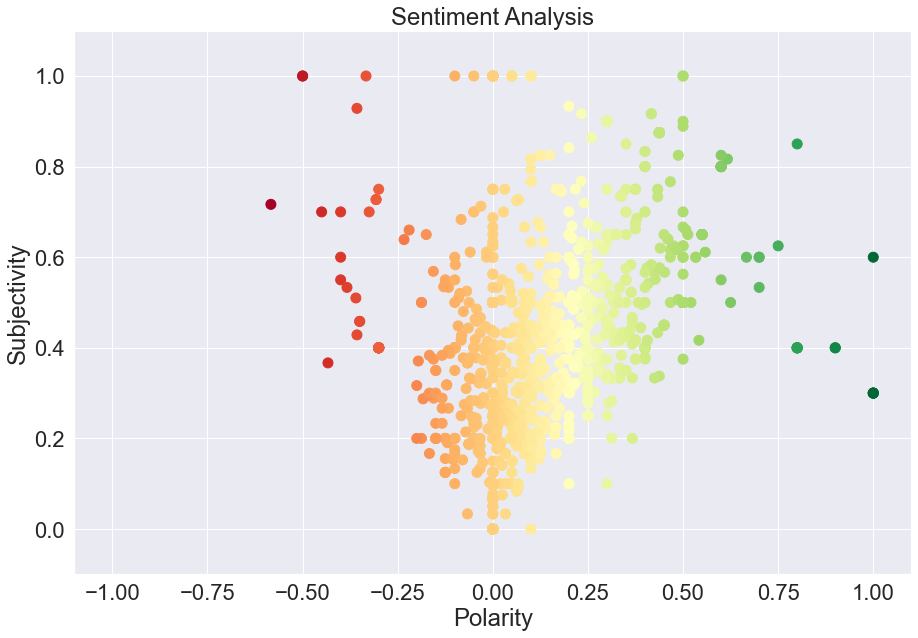

In [16]:
plt.figure(figsize=(15,10)) 

# plt.style.use('seaborn-pastel')

plt.scatter(tweets['Polarity'], tweets['Subjectivity'], c=tweets['Polarity'], s=100, cmap='RdYlGn') 

plt.xlim(-1.1, 1.1)
plt.ylim(-0.1, 1.1) 
plt.title('Sentiment Analysis') 
plt.xlabel('Polarity') 
plt.ylabel('Subjectivity') 
plt.savefig('sentiment_analysis_scatter.png')
plt.show()

In [17]:
# Show the value counts
tweets['Analysis_Polarity'].value_counts()

Positive    965
Neutral     728
Negative    223
Name: Analysis_Polarity, dtype: int64

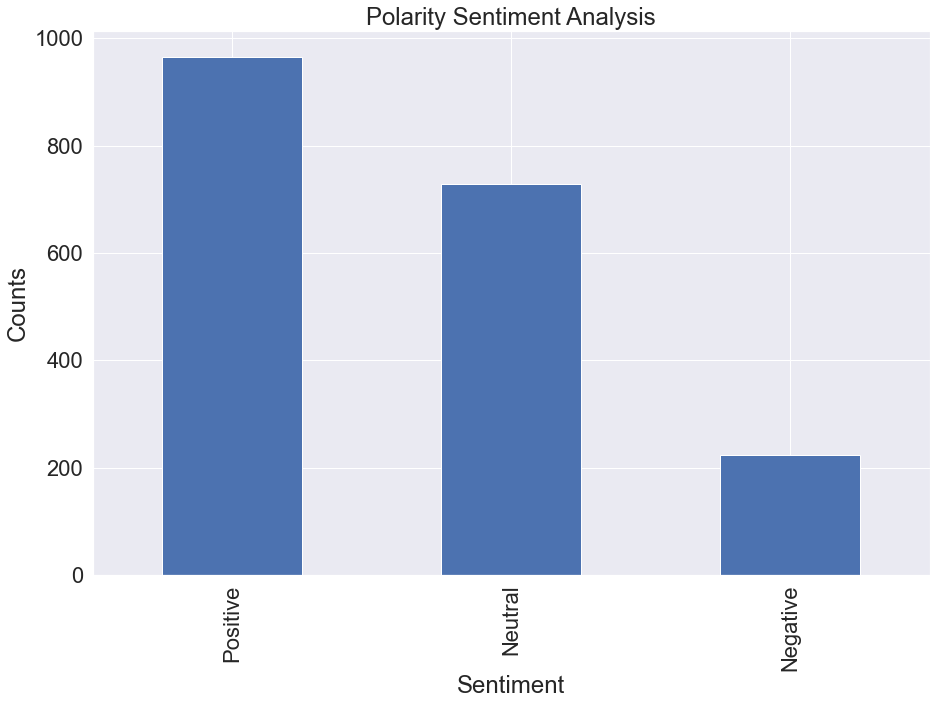

In [18]:
# Plotting and visualizing the counts
plt.figure(figsize=(15,10)) 

plt.title('Polarity Sentiment Analysis')
plt.xlabel('Sentiment')
plt.ylabel('Counts')
tweets['Analysis_Polarity'].value_counts().plot(kind = 'bar')
plt.show()

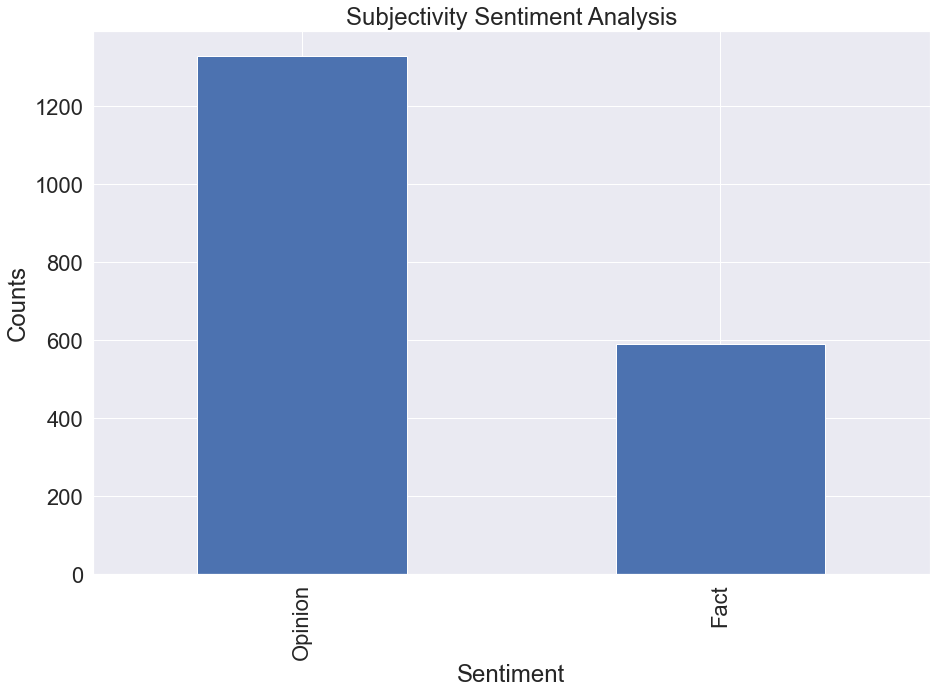

In [19]:
# Plotting and visualizing the counts
plt.figure(figsize=(15,10)) 

plt.title('Subjectivity Sentiment Analysis')
plt.xlabel('Sentiment')
plt.ylabel('Counts')
tweets['Analysis_Subjectivity'].value_counts().plot(kind = 'bar')
plt.show()

In [20]:
# Show the value counts
tweets['Analysis_Subjectivity'].value_counts()

Opinion    1327
Fact        589
Name: Analysis_Subjectivity, dtype: int64

# TOPIC MODELING

In [21]:
import pyLDAvis
import pyLDAvis.gensim_models as gensimvis
import pyLDAvis.sklearn
pyLDAvis.enable_notebook()


from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\decomposition\_lda.py:28: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  EPS = np.finfo(np.float).eps


In [22]:
tf_vectorizer = CountVectorizer(strip_accents = 'unicode',
                                stop_words = 'english',
                                lowercase = True,
                                token_pattern = r'\b[a-zA-Z]{3,}\b',
                                max_df = 0.5, 
                                min_df = 10)
dtm_tf = tf_vectorizer.fit_transform(tweets['cleaned_text'].values.astype('U'))
print(dtm_tf.shape)

(1916, 346)


In [23]:
tfidf_vectorizer = TfidfVectorizer(**tf_vectorizer.get_params())
dtm_tfidf = tfidf_vectorizer.fit_transform(tweets['cleaned_text'].values.astype('U'))
print(dtm_tfidf.shape)

(1916, 346)


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:1796: UserWarning: Only (<class 'numpy.float64'>, <class 'numpy.float32'>, <class 'numpy.float16'>) 'dtype' should be used. <class 'numpy.int64'> 'dtype' will be converted to np.float64.
  warnings.warn("Only {} 'dtype' should be used. {} 'dtype' will "


In [24]:
# for TF DTM
lda_tf = LatentDirichletAllocation(n_components =8, random_state=50)
lda_tf.fit(dtm_tf)
# for TFIDF DTM
lda_tfidf = LatentDirichletAllocation(n_components =8, random_state=50)
lda_tfidf.fit(dtm_tfidf)

LatentDirichletAllocation(n_components=8, random_state=50)

In [30]:
for i,topic in enumerate(lda_tf.components_):
    print(f'Top 10 words for topic #{i}:')
    print([tfidf_vectorizer.get_feature_names()[i] for i in topic.argsort()[-30:]])
    print('\n')

Top 10 words for topic #0:
['adult', 'saturday', 'asks', 'disease', 'requested', 'regulators', 'church', 'doses', 'biontech', 'immune', 'prevent', 'eligibility', 'americans', 'expand', 'pfe', 'recent', 'help', 'died', 'requests', 'caused', 'icu', 'problems', 'germany', 'thailand', 'data', 'dies', 'heart', 'days', 'year', 'old']


Top 10 words for topic #1:
['high', 'immunity', 'getting', 'months', 'like', 'biontech', 'breaking', 'infection', 'vaccinated', 'friday', 'mrna', 'protection', 'pending', 'dose', 'effective', 'doses', 'approval', 'study', 'boosters', 'people', 'just', 'risk', 'vaccines', 'authorized', 'shots', 'adults', 'cdc', 'fda', 'got', 'moderna']


Top 10 words for topic #2:
['adverse', 'weeks', 'countries', 'coronavirus', 'forecast', 'day', 'vaccines', 'age', 'group', 'approval', 'years', 'sales', 'clinics', 'pediatric', 'million', 'according', 'week', 'approved', 'received', 'shots', 'doses', 'cdc', 'said', 'billion', 'parents', 'biontech', 'ages', 'astrazeneca', 'child

In [31]:
pyLDAvis.sklearn.prepare(lda_tf, dtm_tf, tf_vectorizer)

C:\Users\dhwan\AppData\Roaming\Python\Python38\site-packages\pyLDAvis\_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  default_term_info = default_term_info.sort_values(


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
5     -0.179298 -0.020658       1        1  18.745022
3      0.029057  0.215045       2        1  16.522280
1     -0.118220  0.067255       3        1  13.566519
7     -0.120231 -0.135293       4        1  12.976609
6      0.026540 -0.164429       5        1  11.540190
2      0.025995 -0.182364       6        1  10.917261
4     -0.053898  0.214321       7        1   9.652050
0      0.390055  0.006123       8        1   6.080070, topic_info=           Term        Freq       Total Category  logprob  loglift
162     johnson  350.000000  350.000000  Default  30.0000  30.0000
18          amp  355.000000  355.000000  Default  29.0000  29.0000
211         old  130.000000  130.000000  Default  28.0000  28.0000
115         fda  276.000000  276.000000  Default  27.0000  27.0000
191      months  238.000000  238.000000  Default  26.0000  26.0000
..          ...         ...         ...      ...      ...      ...
87      disease    8.623959   35.998256   Topic8  -4.6088   1.3712
253  regulators    8.849498   37.542409   Topic8  -4.5830   1.3550
90        doses   10.982695  114.345470   Topic8  -4.3671   0.4573
44     biontech   11.585228  269.113280   Topic8  -4.3136  -0.3452
32         asks    8.365539   78.644965   Topic8  -4.6393   0.5593

[384 rows x 6 columns], token_table=      Topic      Freq       Term
term                            
0         1  0.250384  according
0         2  0.111282  according
0         6  0.639871  according
1         4  0.962636     adding
2         4  0.945145   addition
...     ...       ...        ...
343       5  0.946943  yesterday
344       1  0.056700       york
344       5  0.907202       york
345       3  0.355659      young
345       5  0.632283      young

[632 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[6, 4, 2, 8, 7, 3, 5, 1])

In [32]:
tweets.head()

,Unnamed: 0.1.1,Unnamed: 0.1.1.1,user_location,date,text,is_retweet,cleaned_text,Subjectivity,Polarity,Analysis_Polarity,Analysis_Subjectivity
0,0,0,NaN,2021-11-12 22:31:19+00:00,"BOOSTER: Right now, anyone ages 18 or older wh...",False,"BOOSTER: Right now, anyone ages 18 or older wh...",0.539683,0.275794,Positive,Opinion
1,1,0,Los Angeles,2021-11-12 22:29:48+00:00,"RT @NBCNews: Of the almost 1,000,000 people wh...",False,": Of the almost 1,000,000 people who had a boo...",0.000000,0.000000,Neutral,Fact
2,2,0,NaN,2021-11-12 22:27:42+00:00,RT @markpoloncarz: If it has been more than 6 ...,False,: If it has been more than 6 months since you ...,0.500000,0.500000,Positive,Opinion
3,3,0,"San Francisco, CA",2021-11-12 22:22:26+00:00,RT @MattHaneySF: All fully vaccinated adults i...,False,: All fully vaccinated adults in California ar...,0.000000,0.000000,Neutral,Fact
4,4,0,"Wellington City, New Zealand",2021-11-12 22:11:47+00:00,I received my second shot of the Covid-19 pfiz...,False,I received my second shot of the Covid-19 pfiz...,0.000000,0.000000,Neutral,Fact


In [33]:
tweets.columns

Index(['Unnamed: 0.1.1', 'Unnamed: 0.1.1.1', 'user_location', 'date', 'text',
       'is_retweet', 'cleaned_text', 'Subjectivity', 'Polarity',
       'Analysis_Polarity', 'Analysis_Subjectivity'],
      dtype='object')

In [34]:
tweets_1=tweets.replace({0:' Difficulties and Risks',1:'Health and Safety',2:'Vaccine Distribution',3:'Vaccine Shots',4:'Vaccine Research',5:'Eligibility for Vaccination',6:'Free Vaccination',7:'Vaccine types'})
tweets_1.to_csv('tweets1.csv')
tweets_1.head()

,Unnamed: 0.1.1,Unnamed: 0.1.1.1,user_location,date,text,is_retweet,cleaned_text,Subjectivity,Polarity,Analysis_Polarity,Analysis_Subjectivity
0,Difficulties and Risks,Difficulties and Risks,NaN,2021-11-12 22:31:19+00:00,"BOOSTER: Right now, anyone ages 18 or older wh...",False,"BOOSTER: Right now, anyone ages 18 or older wh...",0.539683,0.275794,Positive,Opinion
1,Health and Safety,Difficulties and Risks,Los Angeles,2021-11-12 22:29:48+00:00,"RT @NBCNews: Of the almost 1,000,000 people wh...",False,": Of the almost 1,000,000 people who had a boo...",Difficulties and Risks,Difficulties and Risks,Neutral,Fact
2,Vaccine Distribution,Difficulties and Risks,NaN,2021-11-12 22:27:42+00:00,RT @markpoloncarz: If it has been more than 6 ...,False,: If it has been more than 6 months since you ...,0.5,0.5,Positive,Opinion
3,Vaccine Shots,Difficulties and Risks,"San Francisco, CA",2021-11-12 22:22:26+00:00,RT @MattHaneySF: All fully vaccinated adults i...,False,: All fully vaccinated adults in California ar...,Difficulties and Risks,Difficulties and Risks,Neutral,Fact
4,Vaccine Research,Difficulties and Risks,"Wellington City, New Zealand",2021-11-12 22:11:47+00:00,I received my second shot of the Covid-19 pfiz...,False,I received my second shot of the Covid-19 pfiz...,Difficulties and Risks,Difficulties and Risks,Neutral,Fact


In [35]:
topic_values = lda_tf.transform(dtm_tf)
topic_values.shape

(1916, 8)

In [36]:
tweets_1['Topic'] = topic_values.argmax(axis=1)
tweets_1.head()

,Unnamed: 0.1.1,Unnamed: 0.1.1.1,user_location,date,text,is_retweet,cleaned_text,Subjectivity,Polarity,Analysis_Polarity,Analysis_Subjectivity,Topic
0,Difficulties and Risks,Difficulties and Risks,NaN,2021-11-12 22:31:19+00:00,"BOOSTER: Right now, anyone ages 18 or older wh...",False,"BOOSTER: Right now, anyone ages 18 or older wh...",0.539683,0.275794,Positive,Opinion,5
1,Health and Safety,Difficulties and Risks,Los Angeles,2021-11-12 22:29:48+00:00,"RT @NBCNews: Of the almost 1,000,000 people wh...",False,": Of the almost 1,000,000 people who had a boo...",Difficulties and Risks,Difficulties and Risks,Neutral,Fact,5
2,Vaccine Distribution,Difficulties and Risks,NaN,2021-11-12 22:27:42+00:00,RT @markpoloncarz: If it has been more than 6 ...,False,: If it has been more than 6 months since you ...,0.5,0.5,Positive,Opinion,5
3,Vaccine Shots,Difficulties and Risks,"San Francisco, CA",2021-11-12 22:22:26+00:00,RT @MattHaneySF: All fully vaccinated adults i...,False,: All fully vaccinated adults in California ar...,Difficulties and Risks,Difficulties and Risks,Neutral,Fact,4
4,Vaccine Research,Difficulties and Risks,"Wellington City, New Zealand",2021-11-12 22:11:47+00:00,I received my second shot of the Covid-19 pfiz...,False,I received my second shot of the Covid-19 pfiz...,Difficulties and Risks,Difficulties and Risks,Neutral,Fact,5


In [37]:
tweets['Topic'] = topic_values.argmax(axis=1)

In [38]:
tweets_1.head()

,Unnamed: 0.1.1,Unnamed: 0.1.1.1,user_location,date,text,is_retweet,cleaned_text,Subjectivity,Polarity,Analysis_Polarity,Analysis_Subjectivity,Topic
0,Difficulties and Risks,Difficulties and Risks,NaN,2021-11-12 22:31:19+00:00,"BOOSTER: Right now, anyone ages 18 or older wh...",False,"BOOSTER: Right now, anyone ages 18 or older wh...",0.539683,0.275794,Positive,Opinion,5
1,Health and Safety,Difficulties and Risks,Los Angeles,2021-11-12 22:29:48+00:00,"RT @NBCNews: Of the almost 1,000,000 people wh...",False,": Of the almost 1,000,000 people who had a boo...",Difficulties and Risks,Difficulties and Risks,Neutral,Fact,5
2,Vaccine Distribution,Difficulties and Risks,NaN,2021-11-12 22:27:42+00:00,RT @markpoloncarz: If it has been more than 6 ...,False,: If it has been more than 6 months since you ...,0.5,0.5,Positive,Opinion,5
3,Vaccine Shots,Difficulties and Risks,"San Francisco, CA",2021-11-12 22:22:26+00:00,RT @MattHaneySF: All fully vaccinated adults i...,False,: All fully vaccinated adults in California ar...,Difficulties and Risks,Difficulties and Risks,Neutral,Fact,4
4,Vaccine Research,Difficulties and Risks,"Wellington City, New Zealand",2021-11-12 22:11:47+00:00,I received my second shot of the Covid-19 pfiz...,False,I received my second shot of the Covid-19 pfiz...,Difficulties and Risks,Difficulties and Risks,Neutral,Fact,5


<Figure size 2880x1800 with 0 Axes>

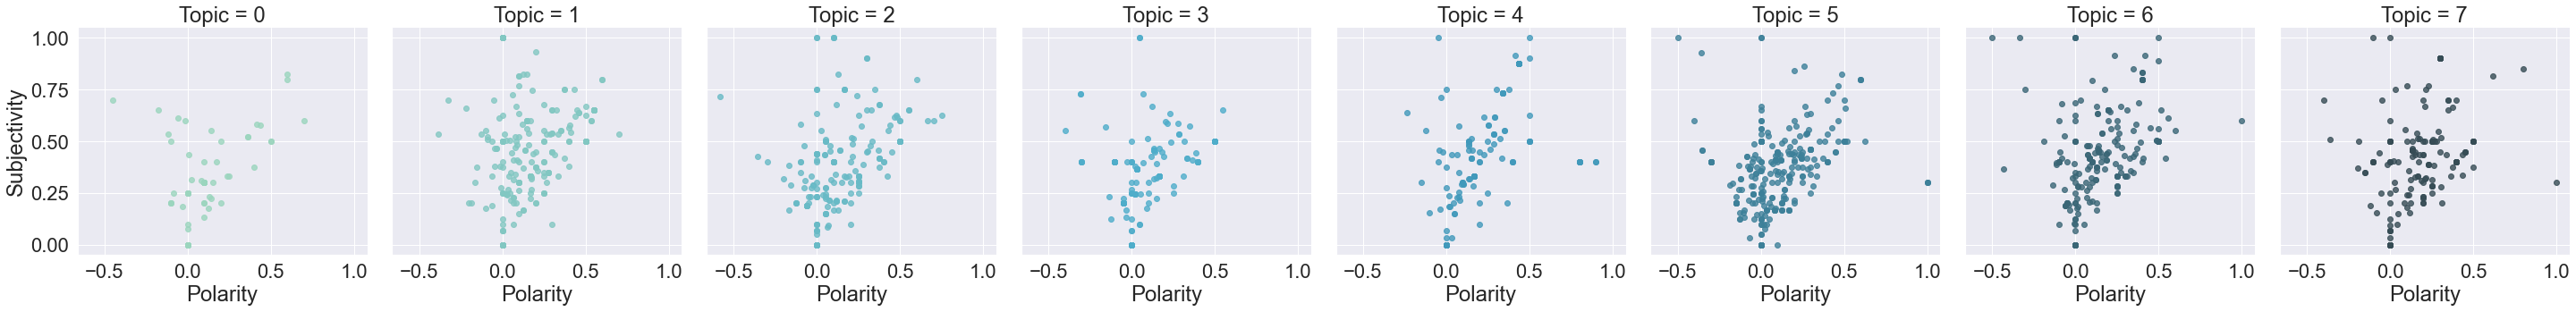

In [39]:
import seaborn as sns


plt.figure(figsize=(40,25)) 

g=sns.lmplot(x="Polarity", y="Subjectivity", hue='Topic', data=tweets, fit_reg=False, legend=False,palette="GnBu_d", col='Topic', legend_out=True)
 
# # Move the legend to an empty part of the plot
# plt.legend(loc='lower right')
 
plt.show()

In [40]:
tweets_2= tweets_1.groupby(['Topic'])['Analysis_Polarity'].value_counts().unstack('Topic').transpose()

tweets_2

Analysis_Polarity,Negative,Neutral,Positive
Topic,,,
0,11,58,36
1,23,123,147
2,35,90,123
3,32,155,118
4,10,59,114
5,62,105,162
6,33,58,139
7,17,80,126


In [41]:
tweets_2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8 entries, 0 to 7
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   Negative  8 non-null      int64
 1   Neutral   8 non-null      int64
 2   Positive  8 non-null      int64
dtypes: int64(3)
memory usage: 256.0 bytes


In [42]:
tweets_2['Total'] = tweets_2.sum(axis=1)

In [43]:
tweets_2.columns

Index(['Negative', 'Neutral', 'Positive', 'Total'], dtype='object', name='Analysis_Polarity')

In [44]:
for i in tweets_2:
    tweets_2[i] = round(tweets_2[i]*100/tweets_2.Total)

tweets_2

Analysis_Polarity,Negative,Neutral,Positive,Total
Topic,,,,
0,10.0,55.0,34.0,100.0
1,8.0,42.0,50.0,100.0
2,14.0,36.0,50.0,100.0
3,10.0,51.0,39.0,100.0
4,5.0,32.0,62.0,100.0
5,19.0,32.0,49.0,100.0
6,14.0,25.0,60.0,100.0
7,8.0,36.0,57.0,100.0


In [45]:
tweets_2=tweets_2.fillna(0)

In [46]:
#Conduct Polarity Topic Analysis using Tableau

tweets_2.to_excel("Polarity_Topic Modeling.xlsx")

In [47]:
tweets_2= tweets_2.drop(['Total'], axis=1)

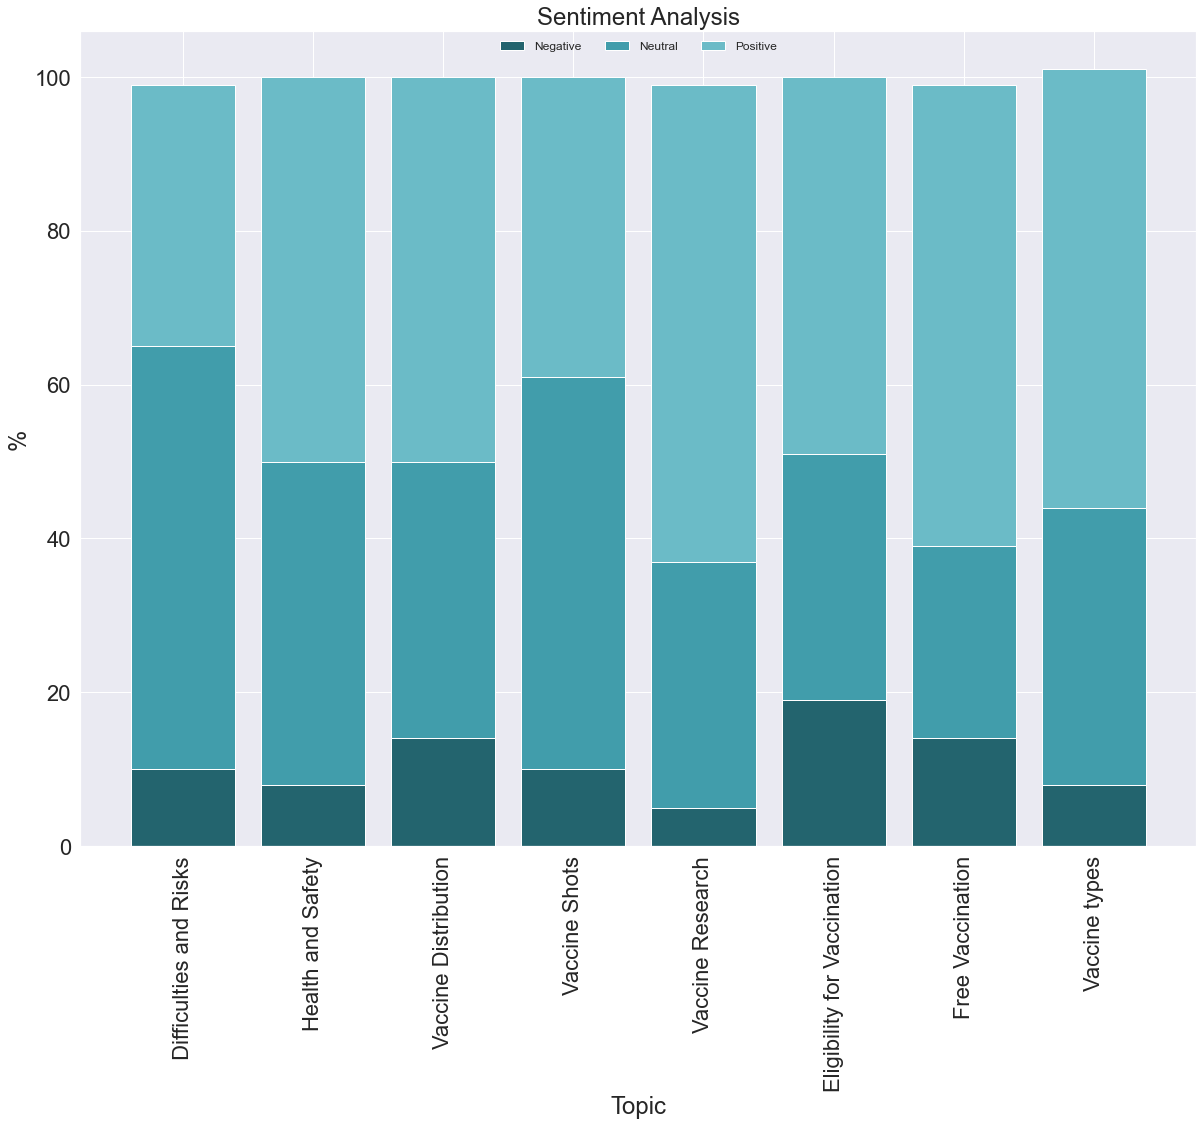

In [49]:
#Plotting and visualizing the counts
plt.figure(figsize=(20,15)) 


topic = [' Difficulties and Risks','Health and Safety','Vaccine Distribution','Vaccine Shots','Vaccine Research','Eligibility for Vaccination','Free Vaccination','Vaccine types']
sentiment = ['Negative', 'Neutral', 'Positive']
plt.title('Sentiment Analysis')
plt.xlabel('Sentiment')
plt.ylabel('%')
p1=plt.bar(topic,tweets_2['Negative'], color='#23646e')
p2=plt.bar(topic,tweets_2['Neutral'], color='#419dab', bottom=tweets_2['Negative'])
p3=plt.bar(topic,tweets_2['Positive'], color='#6bbbc7', bottom=tweets_2['Neutral']+tweets_2['Negative'])
plt.xticks(topic, rotation=90)
plt.xlabel("Topic")
plt.legend((p1[0], p2[0], p3[0]),('Negative', 'Neutral', 'Positive'),fontsize=12, ncol=4, framealpha=0, fancybox=True, loc='upper center')

plt.show()
